In [5]:

import numpy as np
import matplotlib.pyplot as plt

from scipy import interpolate
from scipy.interpolate import interp1d

#import tensorflow as tf
#from tf_fun import init as tf_init

from matplotlib import cm
start = 0.0
stop = 1.0
number_of_lines= 3
cm_subsection = np.linspace(start, stop, number_of_lines) 
plt.rcParams['axes.linewidth'] = 2.2
#set the value globally

(3, 45) (3, 45)
Data points used: 3


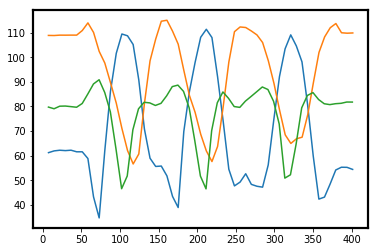

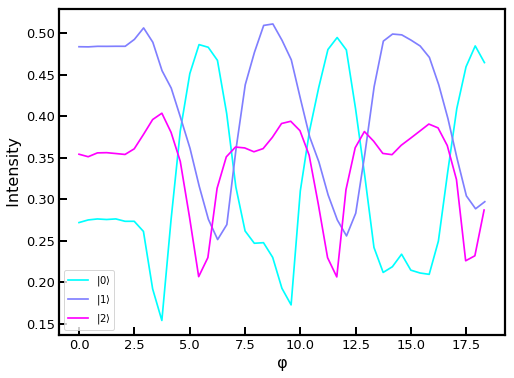

In [8]:

 
from numpy import genfromtxt
filenames = [
    './data2/data_13-06-2018_19-18_port0.csv',
    './data2/data_13-06-2018_19-18_port1.csv',
    './data2/data_13-06-2018_19-18_port2.csv',
]
filenames = [
    './data2/data_05-07-2018_20-20_port0.csv',
    './data2/data_05-07-2018_20-30_port1.csv',
    './data2/data_05-07-2018_20-20_port2.csv',
]
exp_points = [genfromtxt(i, delimiter=',') for i in filenames]
times = np.array([exp_points[i].T[1] for i in range(len(filenames))])
exp_points = np.array([i.T[0] for i in exp_points])
for i,t in zip(exp_points,times):
    plt.plot(t,i)

me_min, ampl, per = 0, 75*3 ,110
start_exp, end_exp =0,45
bias = [t[-1]-times[-1][-1] for t in times]
data = np.array([d[start_exp:end_exp] for d in exp_points])
pts = np.array([t[start_exp:end_exp] - t[start_exp] for t,i in zip(times,range(3))])
print(data.shape,pts.shape)


data = data - me_min
data /= ampl 
pts = pts/per*2*np.pi

colors = [ cm.cool(x) for x in cm_subsection ]
f, ax = plt.subplots(1,1,figsize=(8,6))
labels = [r"$| %i \rangle$"%i for i in range(3)]
for x,i,color,label in zip(pts,data,colors,labels):
    ax.plot(x,i,color=color,linewidth=1.7,label=label)
plt.legend()

def set_fonts_ticks():
    fontsize =16
    plt.xlabel(' φ ',fontsize=fontsize)
    plt.ylabel(' Intensity ', fontsize=fontsize)

    ax.tick_params(axis="y",direction="in",labelsize=13,width=2,length=8)
    ax.tick_params(axis="x",direction="in",labelsize=13,width=2,length=8)
    plt.savefig('experimental_plot.pdf')

set_fonts_ticks()

l = len(pts)
print('Data points used:',l)

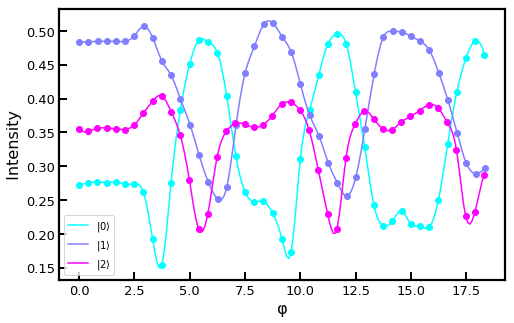

In [9]:

x = pts
y = data[0] 
fig, ax = plt.subplots(1,1,figsize=(8,5))
def plot_interp(x,y,color=None,label=None):
    f2 = interp1d(x, y, kind='cubic')
    xnew = np.linspace(min(x), max(x), num=200, endpoint=True)
    plt.plot(x, y, 'o',color=color)
    plt.plot( xnew,   f2(xnew), '-',color=color,label=label)
    
labels = [r"$| %i \rangle$"%i for i in range(3)]
for x,i,c,l in zip(x,data,colors,labels):
    plot_interp(x,i,color=c,label=l)

plt.legend()
set_fonts_ticks()
plt.savefig('experimental_plot.pdf')
plt.show()



In [10]:

x = pts
y = data[0]
tck = interpolate.splrep(x, y, s=0.001)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)


TypeError: Lengths of the first three arguments (x,y,w) must be equal

ValueError: x and y must have same first dimension, but have shapes (3, 32) and (32,)

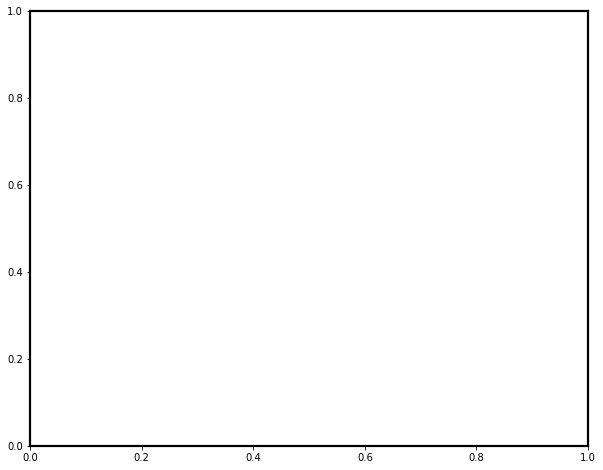

In [196]:

plt.figure(figsize=(10,8))
plt.plot(x, y, 'x', xnew, ynew, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.title('Cubic-spline interpolation')
plt.show()